# import modules

In [58]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
pd.set_option('display.max_rows',None)

# read csv

In [59]:
filename = "train_university_admission_data.csv"
names = ['admit','gre','gpa','prestige']
dfTrain = pd.read_csv(filename, names=names)
dfTest = pd.read_csv(filename, names=names)

In [60]:
dfTrain = pd.read_csv("train_university_admission_data.csv")
dfTest = pd.read_csv("test_university_admission_data.csv")

# display data

In [61]:
dfTrain.head()

,admit,gre,gpa,prestige
0,0,380,3.61,good
1,1,660,3.67,good
2,1,800,4.00,best
3,1,640,3.19,ok
4,0,520,2.93,ok


In [62]:
dfTrain

,admit,gre,gpa,prestige
0,0,380,3.61,good
1,1,660,3.67,good
2,1,800,4.00,best
3,1,640,3.19,ok
4,0,520,2.93,ok
5,1,760,3.00,veryGood
6,1,560,2.98,best
7,0,400,3.08,veryGood
8,1,540,3.39,good
9,0,700,3.92,veryGood


In [63]:
dfTest.head()

,gre,gpa,prestige
0,640,3.30,veryGood
1,660,3.60,good
2,400,3.15,veryGood
3,680,3.98,veryGood
4,220,2.83,good


In [64]:
dfTrain.describe()

,admit,gre,gpa
count,300.000000,300.000000,300.000000
mean,0.306667,590.866667,3.386233
std,0.461880,117.717630,0.374880
min,0.000000,300.000000,2.260000
25%,0.000000,515.000000,3.130000
50%,0.000000,600.000000,3.390000
75%,1.000000,680.000000,3.642500
max,1.000000,800.000000,4.000000


In [65]:
dfTrain.groupby('admit').size()

admit
0    208
1     92
dtype: int64

In [66]:
dfTrain.groupby(['prestige','admit']).size()

prestige  admit
best      0        20
          1        25
good      0        73
          1        19
ok        0        47
          1         9
veryGood  0        68
          1        39
dtype: int64

In [67]:
list(dfTrain.groupby('prestige'))

[('best',      admit  gre   gpa prestige
  2        1  800  4.00     best
  6        1  560  2.98     best
  11       0  440  3.22     best
  12       1  760  4.00     best
  14       1  700  4.00     best
  19       1  540  3.81     best
  25       1  800  3.66     best
  26       1  620  3.61     best
  29       0  520  3.29     best
  34       0  360  3.14     best
  36       0  580  3.25     best
  67       0  620  3.30     best
  68       0  580  3.69     best
  69       0  800  3.73     best
  78       0  540  3.12     best
  79       1  620  4.00     best
  88       0  700  3.28     best
  91       1  720  3.64     best
  106      1  700  3.56     best
  113      0  600  3.22     best
  118      1  800  3.70     best
  126      1  600  3.54     best
  139      1  600  3.58     best
  148      1  480  2.91     best
  149      0  740  3.31     best
  150      1  800  3.74     best
  157      1  480  3.58     best
  165      0  700  4.00     best
  202      1  700  4.00     best
  

In [68]:
dfTrain.groupby('prestige').size()

prestige
best         45
good         92
ok           56
veryGood    107
dtype: int64

In [69]:
dfTrain.groupby('admit').mean()

,gre,gpa
admit,,
0,573.461538,3.336587
1,630.217391,3.498478


In [70]:
dfTrain.groupby('prestige').mean()

,admit,gre,gpa
prestige,,,
best,0.555556,620.444444,3.480889
good,0.206522,579.130435,3.449457
ok,0.160714,573.571429,3.298571
veryGood,0.364486,597.570093,3.337944


In [71]:
dfTrain.groupby('prestige').mean()[['gre','gpa']]

,gre,gpa
prestige,,
best,620.444444,3.480889
good,579.130435,3.449457
ok,573.571429,3.298571
veryGood,597.570093,3.337944


In [72]:
dfTrain.corr()

,admit,gre,gpa
admit,1.000000,0.222689,0.199463
gre,0.222689,1.000000,0.377243
gpa,0.199463,0.377243,1.000000


In [73]:
list(dfTrain.groupby('admit')['prestige'])

[(0, 0          good
  4            ok
  7      veryGood
  9      veryGood
  10           ok
  11         best
  13     veryGood
  15         good
  16           ok
  17         good
  18     veryGood
  20         good
  22           ok
  23           ok
  29         best
  30           ok
  31         good
  32         good
  34         best
  35     veryGood
  36         best
  37         good
  40     veryGood
  43         good
  44     veryGood
  47           ok
  48           ok
  49         good
  50         good
  51           ok
  52           ok
  54         good
  56         good
  57         good
  58     veryGood
  59           ok
  61           ok
  62         good
  64         good
  65     veryGood
  66           ok
  67         best
  68         best
  69         best
  70         good
  71           ok
  72           ok
  73     veryGood
  74           ok
  75         good
  76         good
  78         best
  80           ok
  81     veryGood
  82     veryGood
  83   

In [74]:
print(pd.crosstab(dfTrain['admit'], dfTrain['prestige']))

prestige  best  good  ok  veryGood
admit                             
0           20    73  47        68
1           25    19   9        39


In [75]:
pd.crosstab(dfTrain['admit'], dfTrain['prestige'], rownames=['Admit']).loc[1].sum()

92

In [76]:
pd.crosstab(dfTrain['admit'], dfTrain['prestige'], rownames=['Admit']).loc[0].sum()

208

In [77]:
print(pd.crosstab(dfTrain['admit'], dfTrain['prestige'], rownames=['admit']).sum())

prestige
best         45
good         92
ok           56
veryGood    107
dtype: int64


In [78]:
pd.crosstab(dfTrain['admit'], dfTrain['prestige'], rownames=['admit']).unstack()

prestige  admit
best      0        20
          1        25
good      0        73
          1        19
ok        0        47
          1         9
veryGood  0        68
          1        39
dtype: int64

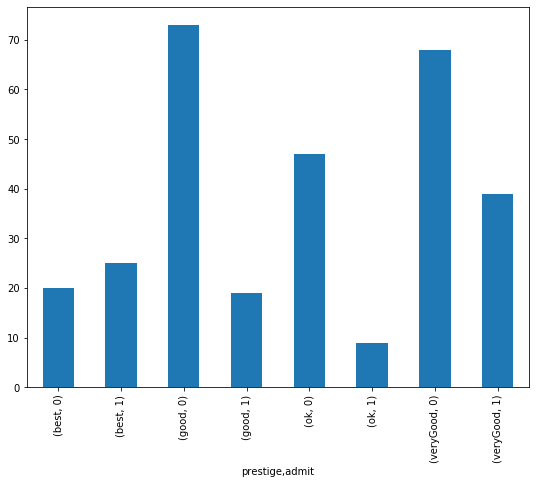

In [79]:
pd.crosstab(dfTrain['admit'], dfTrain['prestige'], rownames=['admit']).unstack().plot(kind='bar',figsize=(9,7))

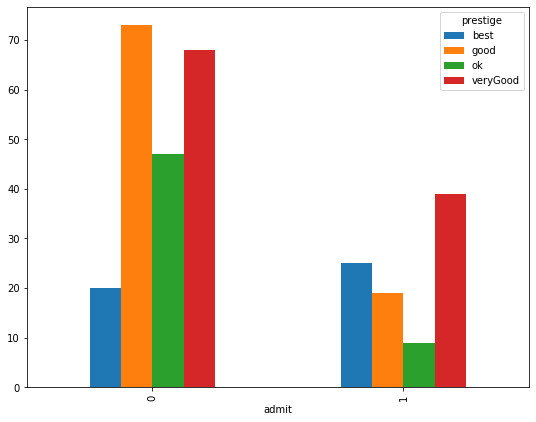

In [80]:
pd.crosstab(dfTrain['admit'], dfTrain['prestige']).plot(kind='bar',figsize=(9,7))

In [81]:
print(pd.crosstab(dfTrain['prestige'], dfTrain['admit'], rownames=['prestige']))

admit      0   1
prestige        
best      20  25
good      73  19
ok        47   9
veryGood  68  39


In [82]:
print(pd.crosstab(dfTrain['prestige'], dfTrain['admit'], rownames=['prestige']).unstack())

admit  prestige
0      best        20
       good        73
       ok          47
       veryGood    68
1      best        25
       good        19
       ok           9
       veryGood    39
dtype: int64


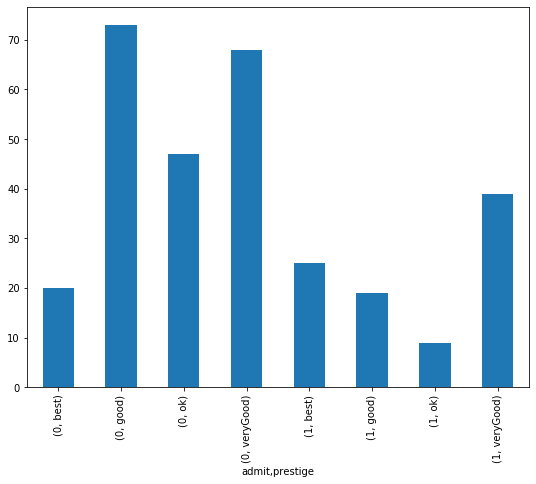

In [83]:
pd.crosstab(dfTrain['prestige'], dfTrain['admit'], rownames=['prestige']).unstack().plot(kind='bar',figsize=(9,7))

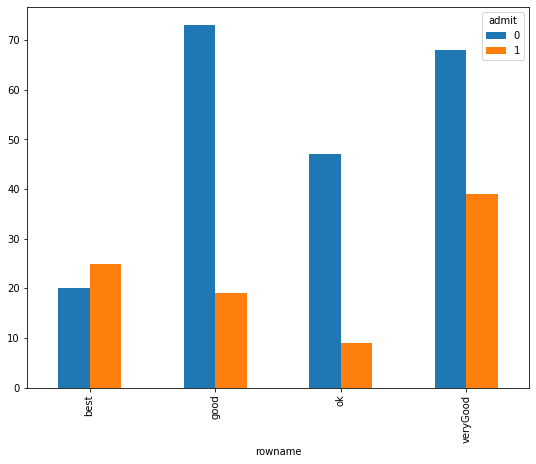

In [84]:
pd.crosstab(dfTrain['prestige'], dfTrain['admit'], rownames=['rowname']).plot(kind='bar',figsize=(9,7))

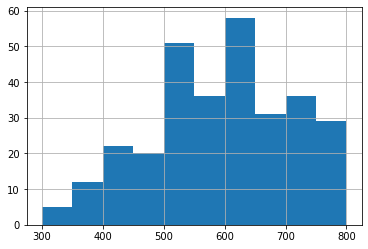

In [35]:
#dfTrain['gpa'].hist()
dfTrain['gre'].hist()

In [36]:
dfTrain['gpa'].hist(,figsize=(9,7))
#dfTrain['gre'].hist()

SyntaxError: invalid syntax (<ipython-input-36-42237d63be57>, line 1)

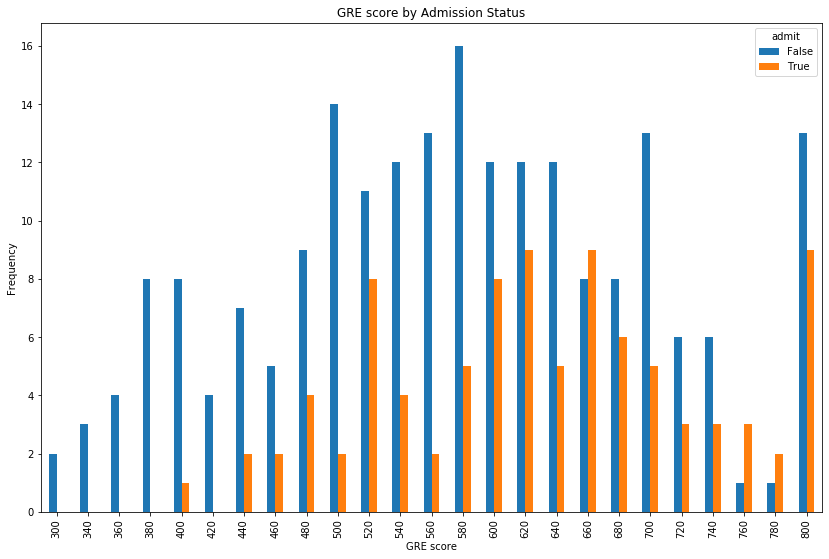

In [37]:
pd.crosstab(dfTrain.gre, dfTrain.admit.astype(bool)).plot(kind='bar',figsize=(14,9))
pl.title('GRE score by Admission Status')
pl.xlabel('GRE score')
pl.ylabel('Frequency')
pl.show()

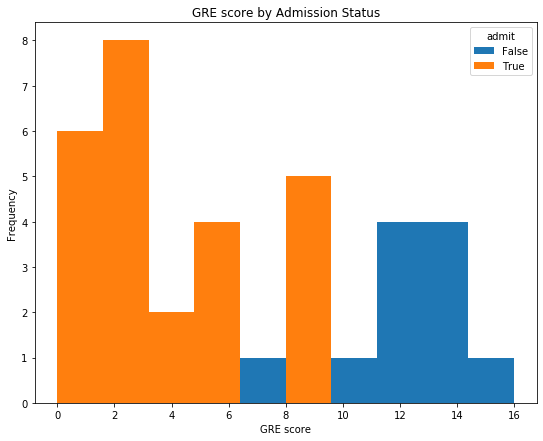

In [38]:
pd.crosstab(dfTrain.gre, dfTrain.admit.astype(bool)).plot(kind='hist',figsize=(9,7))
pl.title('GRE score by Admission Status')
pl.xlabel('GRE score')
pl.ylabel('Frequency')
pl.show()

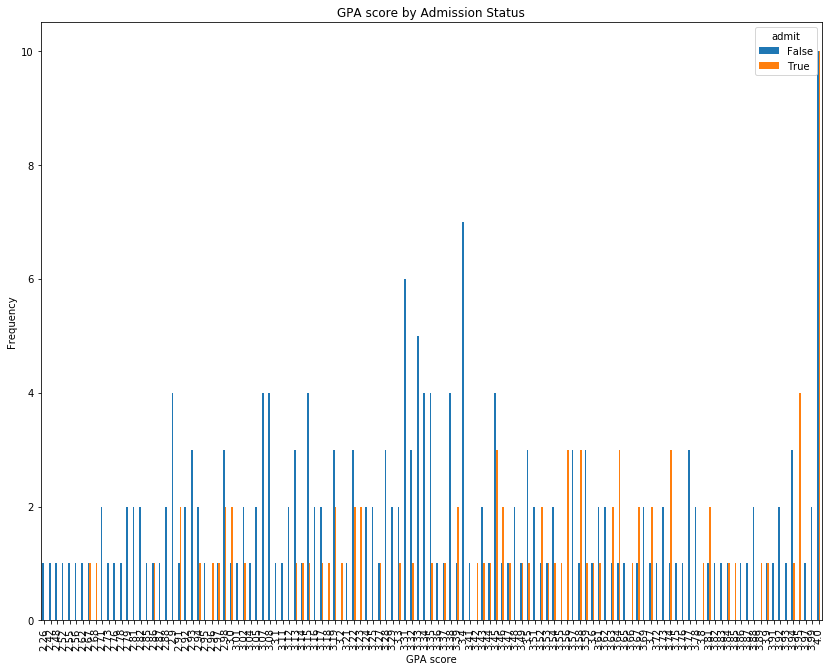

In [39]:
pd.crosstab(dfTrain.gpa, dfTrain.admit.astype(bool)).plot(kind='bar',figsize=(14,11))
pl.title('GPA score by Admission Status')
pl.xlabel('GPA score')
pl.ylabel('Frequency')
pl.show()

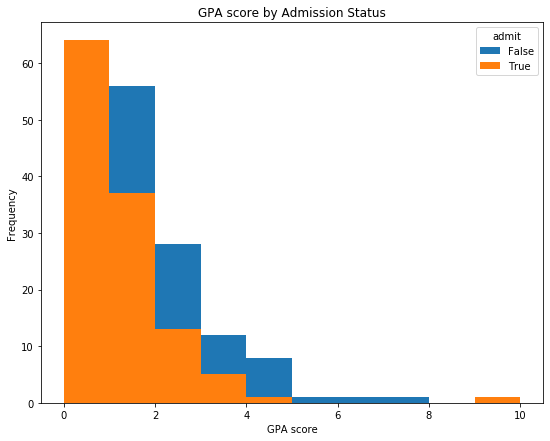

In [40]:
pd.crosstab(dfTrain.gpa, dfTrain.admit.astype(bool)).plot(kind='hist',figsize=(9,7))
pl.title('GPA score by Admission Status')
pl.xlabel('GPA score')
pl.ylabel('Frequency')
pl.show()

In [41]:
dummy_ranks = pd.get_dummies(dfTrain['prestige'], prefix='prestige')
print (dummy_ranks.head())

   prestige_best  prestige_good  prestige_ok  prestige_veryGood
0              0              1            0                  0
1              0              1            0                  0
2              1              0            0                  0
3              0              0            1                  0
4              0              0            1                  0


In [42]:
cols_to_keep = ['admit', 'gre', 'gpa']
data = dfTrain[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_good':])
print (data.head())

   admit  gre   gpa  prestige_good  prestige_ok  prestige_veryGood
0      0  380  3.61              1            0                  0
1      1  660  3.67              1            0                  0
2      1  800  4.00              0            0                  0
3      1  640  3.19              0            1                  0
4      0  520  2.93              0            1                  0


In [43]:
data['intercept'] = 1.0

print (data.head())

train_cols = data.columns[1:]
print (data.columns[1:])

   admit  gre   gpa  prestige_good  prestige_ok  prestige_veryGood  intercept
0      0  380  3.61              1            0                  0        1.0
1      1  660  3.67              1            0                  0        1.0
2      1  800  4.00              0            0                  0        1.0
3      1  640  3.19              0            1                  0        1.0
4      0  520  2.93              0            1                  0        1.0
Index(['gre', 'gpa', 'prestige_good', 'prestige_ok', 'prestige_veryGood',
       'intercept'],
      dtype='object')


In [44]:
#Logistic Regression
logit = sm.Logit(data['admit'], data[train_cols])

# fit the model
result = logit.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.546708
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  300
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            5
Date:                Mon, 01 Feb 2021   Pseudo R-squ.:                  0.1131
Time:                        14:16:26   Log-Likelihood:                -164.01
converged:                       True   LL-Null:                       -184.92
Covariance Type:            nonrobust   LLR p-value:                 6.406e-08
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
gre                   0.0030      0.001      2.346      0.019       0.000       0.006
gpa     

In [45]:
dfTrain

,admit,gre,gpa,prestige
0,0,380,3.61,good
1,1,660,3.67,good
2,1,800,4.00,best
3,1,640,3.19,ok
4,0,520,2.93,ok
5,1,760,3.00,veryGood
6,1,560,2.98,best
7,0,400,3.08,veryGood
8,1,540,3.39,good
9,0,700,3.92,veryGood


In [46]:
dfTrain.shape

(300, 4)

dfTrain.corr(method='pearson')

In [47]:
dfTrain.corr(method='pearson')

,admit,gre,gpa
admit,1.000000,0.222689,0.199463
gre,0.222689,1.000000,0.377243
gpa,0.199463,0.377243,1.000000


In [48]:
dfTrain.dtypes

admit         int64
gre           int64
gpa         float64
prestige     object
dtype: object

In [49]:
dfTrain.skew()

admit    0.842776
gre     -0.118480
gpa     -0.189184
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E339D35348>,
      dtype=object)

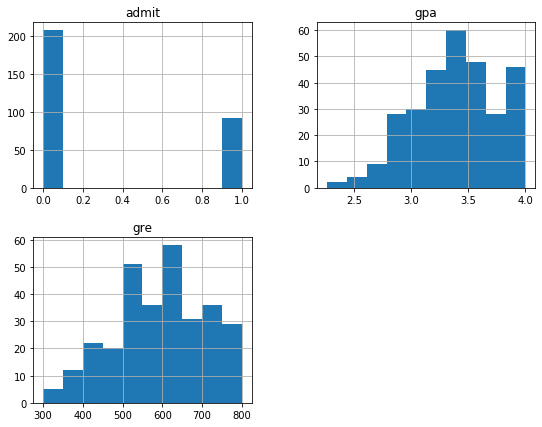

In [50]:
dfTrain.hist(figsize=(9,7))

In [51]:
for i in range(3):
    print('i',end='')

iii